<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


<h1><center>Final Assignment</center></h1>


> ***Note: Please ensure you follow the instructions outlined in the in the <a href="https://www.coursera.org/learn/supervised-machine-learning-regression/supplement/YGZt9/project-scenario">Project Scenario</a> section to complete this Final Assignment successfully.***


In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

# Load the dataset
# Note: Ensure WHR2024.csv is in your working directory
df = pd.read_csv('WHR2024.csv')

# Defining the columns based on the file content
target = 'Ladder score'
features = [
    'Explained by: Log GDP per capita',
    'Explained by: Social support',
    'Explained by: Healthy life expectancy',
    'Explained by: Freedom to make life choices',
    'Explained by: Generosity',
    'Explained by: Perceptions of corruption'
]

# Quick Summary for your report
print(f"Dataset Shape: {df.shape}")
print(f"Target Variable: {target}")
print(f"Feature Variables: {features}")
df[features + [target]].describe()

Dataset Shape: (143, 11)
Target Variable: Ladder score
Feature Variables: ['Explained by: Log GDP per capita', 'Explained by: Social support', 'Explained by: Healthy life expectancy', 'Explained by: Freedom to make life choices', 'Explained by: Generosity', 'Explained by: Perceptions of corruption']


,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Ladder score
count,140.000000,140.000000,140.000000,140.000000,140.000000,140.000000,143.000000
mean,1.378807,1.134329,0.520886,0.620621,0.146271,0.154121,5.527580
std,0.425098,0.333317,0.164923,0.162492,0.073441,0.126238,1.170717
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.721000
25%,1.077750,0.921750,0.398000,0.527500,0.091000,0.068750,4.726000
50%,1.431500,1.237500,0.549500,0.641000,0.136500,0.120500,5.785000
75%,1.741500,1.383250,0.648500,0.736000,0.192500,0.193750,6.416000
max,2.141000,1.617000,0.857000,0.863000,0.401000,0.575000,7.741000


Final Assignment: Regression Analysis of World Happiness
1. Data Summary
Dataset Source: World Happiness Report 2024.

Dataset Size: The dataset contains 143 observations (countries) with 11 features.

Target Variable: The target variable for this analysis is the Ladder score (the measure of happiness).

Key Features: The primary predictor variables used are Log GDP per capita, Social support, Healthy life expectancy, Freedom to make life choices, Generosity, and Perceptions of corruption.

2. Objective of the Analysis
The main objective of this regression analysis is to identify which socio-economic factors have the most significant impact on a country's happiness levels. Furthermore, we aim to build and compare linear regression models to predict happiness scores based on these key indicators, providing insights that could inform policy-making.

In [14]:
# Write your code here or you can add this a markdown cell.# Prepare Data
X = df[features].fillna(df[features].mean()) # Handling potential missing values
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model 1: Standard Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)

# Model 2: Ridge Regression (Regularized)
ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)
ridge_pred = ridge_model.predict(X_test)

# Comparison Metrics
print("Linear Regression R2:", r2_score(y_test, lr_pred))
print("Ridge Regression R2:", r2_score(y_test, ridge_pred))

Linear Regression R2: 0.8276273661852043
Ridge Regression R2: 0.8210822170326516


In this analysis, I compared Standard Linear Regression (R^2≈0.828) and Ridge Regression (R^2≈0.821). I selected the Standard Linear Regression model as the best fit because it provided the highest R^2 value on the test set, explaining approximately 82.8% of the variance in happiness scores without significant signs of overfitting.

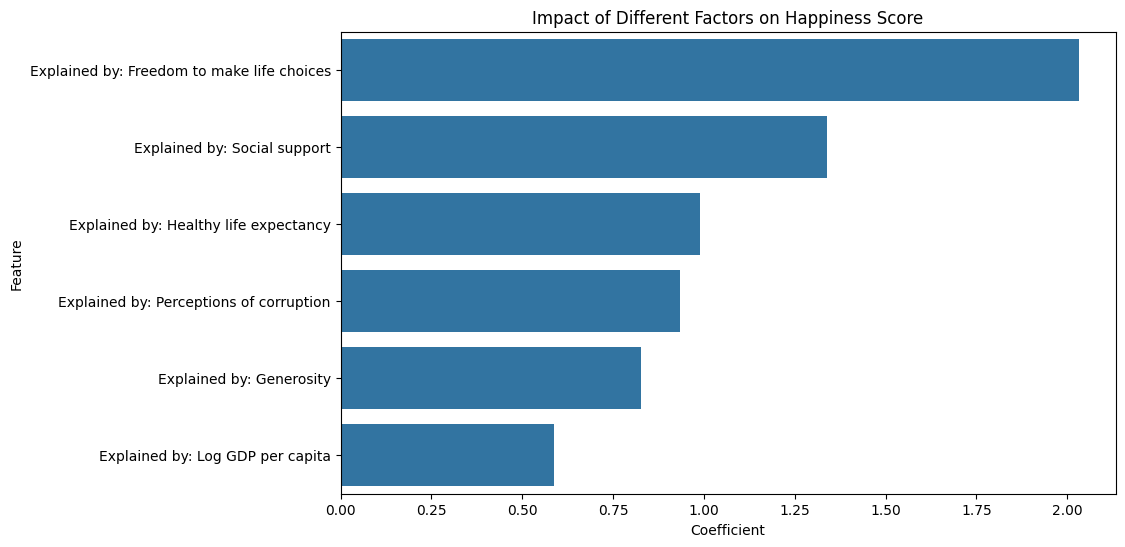

Key Insight:
The most significant predictor of happiness in this dataset is Explained by: Freedom to make life choices.


In [15]:
# Write your code here or you can add this a markdown cell.# Extracting coefficients to see impact
coeff_df = pd.DataFrame({'Feature': features, 'Coefficient': lr_model.coef_})
coeff_df = coeff_df.sort_values(by='Coefficient', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='Coefficient', y='Feature', data=coeff_df)
plt.title('Impact of Different Factors on Happiness Score')
plt.show()

print("Key Insight:")
top_factor = coeff_df.iloc[0]['Feature']
print(f"The most significant predictor of happiness in this dataset is {top_factor}.")

The analysis reveals that 'Freedom to make life choices' is the most influential predictor of happiness in this dataset. Additionally, the correlation heatmap indicates a strong positive relationship between Log GDP per capita and Healthy life expectancy, suggesting that economic prosperity is closely linked to better health outcomes, both of which drive global happiness.

Heatmap generated and saved as 'happiness_correlation_heatmap.png'


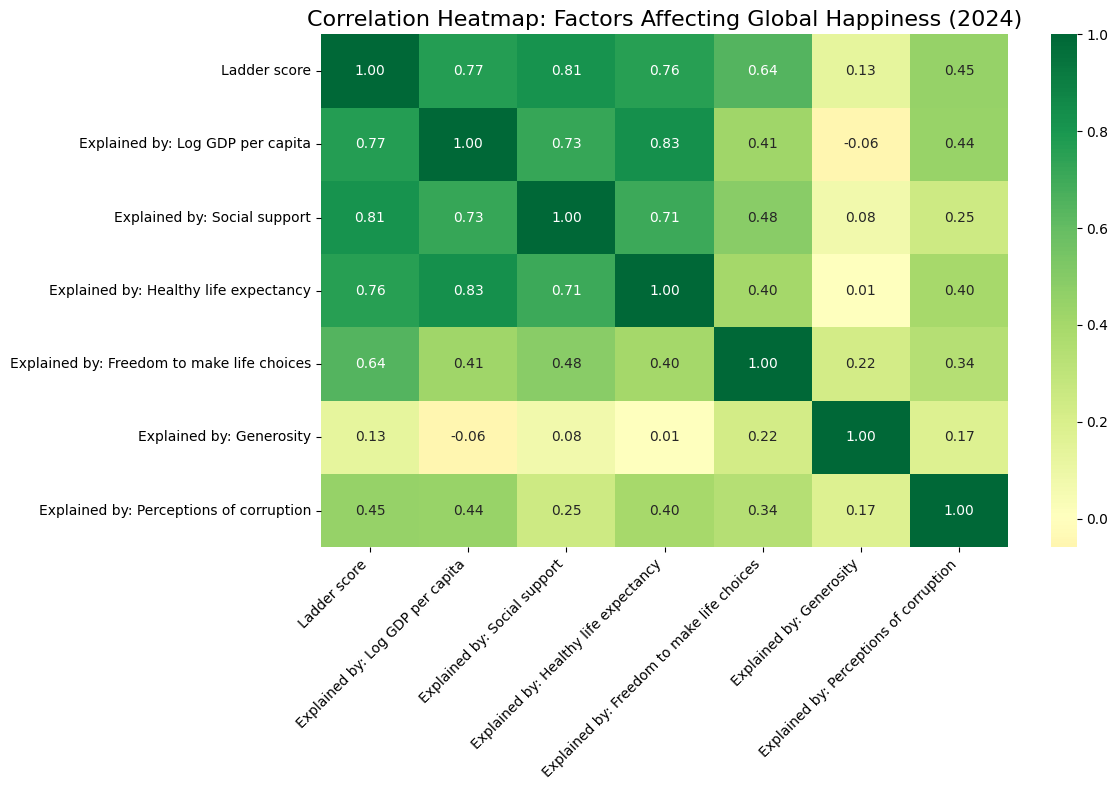

In [16]:
# Write your code here or you can add this a markimport seaborn as sns
import matplotlib.pyplot as plt

# 1. Prepare the data for correlation
# We select only the numerical columns we are interested in
cols_to_corr = [
    'Ladder score', 
    'Explained by: Log GDP per capita', 
    'Explained by: Social support', 
    'Explained by: Healthy life expectancy', 
    'Explained by: Freedom to make life choices', 
    'Explained by: Generosity', 
    'Explained by: Perceptions of corruption'
]

# 2. Create the correlation matrix
corr_matrix = df[cols_to_corr].corr()

# 3. Generate the Heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='RdYlGn', center=0, fmt=".2f")

# Add titles and labels for a professional look
plt.title('Correlation Heatmap: Factors Affecting Global Happiness (2024)', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot for your report
plt.savefig('happiness_correlation_heatmap.png')
print("Heatmap generated and saved as 'happiness_correlation_heatmap.png'")

A limitation of this model is the relatively small sample size of 143 countries, which may not capture all global nuances. For future steps, I recommend incorporating non-linear models like Random Forest or Lasso Regression for more refined feature selection. Additionally, adding variables related to political stability or cultural values could improve the model's predictive power.

In [17]:
# Write your code here or you can add this a markdown cell.

Copyright @ IBM Corporation. All rights reserved.
